# 高德地图API

In [5]:
import requests
key_cr ="551173cc6b480702a39751e57d0dd9d2"

## 地理编码

*自然语言处理*

In [6]:

import pandas as pd
def geocode(address,city=None,batch=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key_cr,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
万佛园 = geocode('广东省梅州市丰顺县汤坑镇万佛园')
万佛园


{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'geocodes': [{'formatted_address': '广东省梅州市丰顺县万佛园',
   'country': '中国',
   'province': '广东省',
   'citycode': '0753',
   'city': '梅州市',
   'district': '丰顺县',
   'township': [],
   'neighborhood': {'name': [], 'type': []},
   'building': {'name': [], 'type': []},
   'adcode': '441423',
   'street': [],
   'number': [],
   'location': '116.175589,23.740843',
   'level': '兴趣点'}]}

In [7]:
df_万佛园地理编码 = pd.json_normalize(万佛园['geocodes'])
display(df_万佛园地理编码)
万佛园地理编码 = 万佛园['geocodes'][0]['location']
print("万佛园地理编码:",万佛园地理编码)

,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省梅州市丰顺县万佛园,中国,广东省,0753,梅州市,丰顺县,[],441423,[],[],"116.175589,23.740843",兴趣点,[],[],[],[]


万佛园地理编码: 116.175589,23.740843


## 路径规划

*机器学习、计算机实现智能的原理*

In [8]:
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key_cr,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [9]:
丰顺中学 = geocode('广东省梅州市丰顺县汤坑镇丰顺中学')
丰顺中学_location = 丰顺中学['geocodes'][0]['location']
博士幼儿园= geocode('广东省梅州市丰顺县汤坑镇博士幼儿园')
博士幼儿园_location = 博士幼儿园['geocodes'][0]['location']

丰顺中学_博士幼儿园 = walking(丰顺中学_location,博士幼儿园_location)
丰顺中学_博士幼儿园 

df = pd.json_normalize(丰顺中学_博士幼儿园["route"]["paths"][0]['steps'])
display(df)
df["instruction"]


,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,向东步行348米右转,东,[],348,278,"116.180516,23.742422;116.180547,23.742196;116....",右转,[],0
1,沿市政大道向南步行248米左转,南,市政大道,248,198,"116.181988,23.742552;116.182066,23.742131;116....",左转,[],0
2,沿迎宾路向东步行333米左转,东,迎宾路,333,266,"116.182361,23.740317;116.182431,23.740326;116....",左转,[],0
3,沿广场路向东步行122米向左前方行走,东,广场路,122,98,"116.185208,23.739839;116.186337,23.740004;116....",向左前方行走,[],0
4,沿广场路向东北步行259米左转,东北,广场路,259,207,"116.186393,23.740013;116.186554,23.740091;116....",左转,[],0
5,沿沿江路向西北步行164米左转,西北,沿江路,164,131,"116.188359,23.741506;116.187335,23.742656",左转,[],0
6,向西南步行24米到达目的地,西南,[],24,19,"116.187331,23.742656;116.187114,23.742569",[],到达目的地,0


0            向东步行348米右转
1       沿市政大道向南步行248米左转
2        沿迎宾路向东步行333米左转
3    沿广场路向东步行122米向左前方行走
4       沿广场路向东北步行259米左转
5       沿沿江路向西北步行164米左转
6         向西南步行24米到达目的地
Name: instruction, dtype: object

## 行政区域查询

*自然语言的处理*

In [10]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key_cr,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

"""福建省"""
行政区域 = district(keywords='350000',extensions='base',subdistrict=2)
行政区域

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'suggestion': {'keywords': [], 'cities': []},
 'districts': [{'citycode': [],
   'adcode': '350000',
   'name': '福建省',
   'center': '119.306239,26.075302',
   'level': 'province',
   'districts': [{'citycode': '0591',
     'adcode': '350100',
     'name': '福州市',
     'center': '119.306239,26.075302',
     'level': 'city',
     'districts': [{'citycode': '0591',
       'adcode': '350121',
       'name': '闽侯县',
       'center': '119.145117,26.148567',
       'level': 'district',
       'districts': []},
      {'citycode': '0591',
       'adcode': '350123',
       'name': '罗源县',
       'center': '119.552645,26.487234',
       'level': 'district',
       'districts': []},
      {'citycode': '0591',
       'adcode': '350124',
       'name': '闽清县',
       'center': '118.868416,26.223793',
       'level': 'district',
       'districts': []},
      {'citycode': '0591',
       'adcode': '350122',
       'name': '连江县',
       '

## 搜索POI

*推荐算法、计算机实现智能的原理*

In [11]:
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key_cr,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

梅州_中学 = place_text(keywords=None,types='高等院校',city="梅州市",children=1,extensions='all')
梅州_中学
df_梅州_中学 = pd.json_normalize(梅州_中学["pois"])
df_梅州_中学

,id,parent,childtype,name,tag,type,typecode,biz_type,address,location,...,discount_num,event,children,photos,indoor_data.cpid,indoor_data.floor,indoor_data.truefloor,indoor_data.cmsid,biz_ext.rating,biz_ext.cost
0,B02F101E61,[],[],嘉应学院医学院,[],科教文化服务;学校;高等院校,141201,[],黄塘路146号,"116.097691,24.315166",...,0,[],"[{'id': ' B0FFG7VYX4 ', 'name': ' 嘉应学院医学院(西南门)...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
1,B02F1042ZH,[],[],梅州市理工学校天子岌校区,[],科教文化服务;学校;高等院校,141201,[],东山大道学院路15号,"116.131916,24.321533",...,0,[],"[{'id': ' B02F10QAOI ', 'name': ' 梅州市理工学校天子岌校区...",[],[],[],[],[],3.0,[]
2,B02F10QAIP,[],[],嘉应学院江南校区,[],科教文化服务;学校;高等院校,141201,[],三角镇富奇路128号,"116.11865,24.275986",...,0,[],"[{'id': ' B02F103JSK ', 'name': ' 嘉应学院江南校区(西北门...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
3,B02F10RZF0,B02F1042ZH,0,梅州市理工学校尧排校区,[],科教文化服务;学校;高等院校,141201,[],学院路15号,"116.133986,24.320081",...,0,[],"[{'id': ' B02F10RZF2 ', 'name': ' 梅州市理工学校尧排校区(...",[],[],[],[],[],[],[]
4,B02F103G72,[],[],宪梓大楼,[],科教文化服务;学校;高等院校,141201,[],月梅路47号嘉应学院江北校区,"116.128226,24.327611",...,0,[],[],[],[],[],[],[],[],[]
5,B02F102O9Z,[],[],梅州市老干部大学,[],科教文化服务;学校;高等院校,141201,[],梅龙西路9号,"116.126524,24.297283",...,0,[],"[{'id': ' B0FFG7WL27 ', 'name': ' 梅州市老干部大学(南门)...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
6,B0FFG6Y034,[],[],华浦贵金属商学院,[],科教文化服务;学校;高等院校,141201,[],梅龙东路4-4,"116.131852,24.295691",...,0,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
7,B0FFIPTEG1,[],[],有信达双创学院,[],科教文化服务;学校;高等院校,141201,[],教子岌路与102乡道交叉口西100米,"116.089655,24.298562",...,0,[],[],[],[],[],[],[],[],[]
8,B0FFHK3W7K,[],[],梅州市行政学院,[],科教文化服务;学校;高等院校,141201,[],华南大道27号附近,"116.118579,24.273659",...,0,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
9,B02F103G74,[],[],嘉应学院,[],科教文化服务;学校;高等院校,141201,[],月梅路47嘉应大学,"116.132761,24.326663",...,0,[],"[{'id': ' B0FFJ8VFCX ', 'name': ' 嘉应学院(北门) ', ...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.0,[]


In [12]:
def place_around(location,keywords=None,types=None,city=None,redius=None,sortrule=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/around?parameters'
    params={
        'key':key_cr,
        'keywords':keywords,
        'location':location,
        'types':types,
        'city':city,
        'redius':redius,
        'sortrule':sortrule,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
丰顺中学POI = place_around(丰顺中学_location)
df_丰顺中学POI = pd.json_normalize(丰顺中学POI['pois'])
df_丰顺中学POI


,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,distance,biz_ext,importance,shopid,shopinfo,poiweight,photos
0,B0FFH9S32K,B02F103D79,309,丰顺中学宿舍区,商务住宅;住宅区;宿舍,120303,[],市政大道西150米,"116.180326,23.743296",[],99,[],[],[],0,[],[]
1,B0FFHOYB52,[],[],顺丰速运,生活服务;物流速递;物流速递,070500,[],市政大道丰顺中学前锦江街2-49号,"116.182190,23.742550",95338,164,[],[],[],0,[],[]
2,B0FFFSCT9E,[],[],中通快递,生活服务;物流速递;物流速递,070500,[],锦江街2-49号(丰顺中学对面),"116.182257,23.742689",95311,173,[],[],[],0,[],[]
3,B0FFIL20H8,[],[],包大头(丰顺中学店),餐饮服务;快餐厅;快餐厅,050300,diner,汤坑镇丰源路融景湾小区第五栋A17(现市政大道2-50号),"116.182254,23.742710",13726668590,173,[],[],[],0,[],[]
4,B0FFI6NYAH,[],[],申通快递(丰顺中学营业部),生活服务;物流速递;物流速递,070500,[],市政大道a-26号附近,"116.182265,23.742648",95543,173,[],[],[],0,[],[]
5,B0FFHLW6SA,[],[],老潮农家快餐,餐饮服务;中餐厅;中餐厅,050100,diner,汤坑镇丰源路融景影湾小区第五栋A19号(丰顺中学大门正对面),"116.182270,23.742614",17820346039,173,[],[],[],0,[],[]
6,B0FFGYKH3O,[],[],圆通速递,生活服务;物流速递;物流速递,070500,[],市政大道与锦江街交叉口北100米,"116.182270,23.742620",95554,173,[],[],[],0,[],[]
7,B0FFGYAHZD,[],[],韵达快递,生活服务;物流速递;物流速递,070500,[],锦江街b22号附近,"116.182270,23.742621",95546,173,[],[],[],0,[],[]
8,B0FFKPHIBF,[],[],大食八,餐饮服务;快餐厅;快餐厅,050300,diner,汤坑镇丰源路融景湾小区第5栋A16号(现市政大道51号),"116.182251,23.742732",13828184528,173,[],[],[],0,[],[]
9,B0FFJ36J73,[],[],华祥食店,餐饮服务;快餐厅;快餐厅,050300,diner,市政大道A46号,"116.182276,23.742579",13539193972,173,[],[],[],0,[],[]


## IP定位

*专家系统*

In [13]:
def parameters(ip="114.247.50.2",sig=None)->dict:
    url = 'https://restapi.amap.com/v3/ip?parameters'
    params={
        'key':key_cr,
        'ip':ip,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
ip地址= parameters(ip='114.247.50.2')
ip地址

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'province': '北京市',
 'city': '北京市',
 'adcode': '110000',
 'rectangle': '116.0119343,39.66127144;116.7829835,40.2164962'}

## 批量请求接口

*推荐算法1*

In [14]:
def batch():
    url = 'https://restapi.amap.com/v3/batch?key=551173cc6b480702a39751e57d0dd9d2'
    headers = {
        'Content-Type': 'application/json',
    }
    params={
    "ops": [
        {
            "url": "/v3/place/around?offset=10&page=1&key=551173cc6b480702a39751e57d0dd9d2&location=116.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        },
        {
            "url": "/v3/place/around?offset=10&page=1&key=551173cc6b480702a39751e57d0dd9d2&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
        }
    ]
}
    response = requests.get(url,json=params,headers=headers)
    data = response.json()
    return data
batch()

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '888',
   'pois': [{'typecode': '080000',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFKKSDDS',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.511528,39.270463',
     'distance': '1082',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': {},
     'poiweight': {},
     'cityname': '廊坊市',
     'photos': {},
     'type': '体育休闲服务;体育休闲服务场所;体育休闲服务场所',
     'shopinfo': '0',
     'name': '李庄子村兰阳草莓采摘园',
     'childtype': {}},
    {'typecode': '080501',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFJM772Z',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.513958,39.270648',
     'distance': '1205',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '永清镇北辛溜附近',
     'poiweight': {},
     'cit

In [15]:
string_url=batch
string_url

<function __main__.batch()>

## 静态地图

*计算机视觉、图像识别*

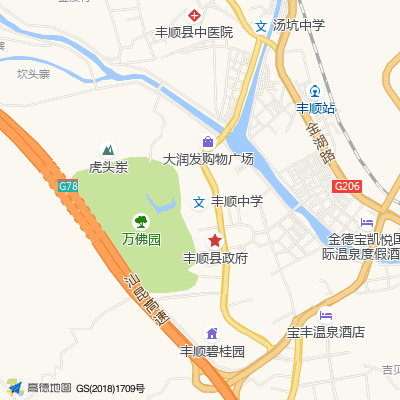

In [16]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key_cr,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data
staticmap(location=丰顺中学_location,zoom=13)

## 坐标转换

In [17]:
def coordinate(locations=None,coordsys=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params={
        'key':key_cr,
        'locations':locations,
        'coordsys':coordsys,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [18]:
转换= coordinate(locations='116.481499,39.990475|116.481499,39.990375',coordsys='gps')
转换

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '116.487585177952,39.991754014757;116.487585177952,39.991653917101'}

## 天气查询

*自然语言的处理*

In [19]:
def weatherInfo(city=None,extensions=None)->dict:
    url = 'https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params={
        'key':key_cr,
        'city':city,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [20]:
天气= weatherInfo(city='110101')
天气

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '北京',
   'city': '东城区',
   'adcode': '110101',
   'weather': '晴',
   'temperature': '12',
   'winddirection': '西北',
   'windpower': '4',
   'humidity': '17',
   'reporttime': '2020-04-22 19:28:34'}]}

## 输入提示

*推荐算法、自然语言处理、机器学习*

In [21]:
def inputtip(keywords,type=None,location=None,city=None,datatype=all)->dict:
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params={
        'key':key_cr,
        'keywords':keywords,
        'type':type,
        'location':location,
        'city':city,
        'datatype':datatype,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [22]:
输入提示=inputtip(keywords='医院',city='广州',datatype=all)
输入提示

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': 'B00140UERJ',
   'name': '广东省人民医院',
   'district': '广东省广州市越秀区',
   'adcode': '440104',
   'location': '113.287241,23.125123',
   'address': '中山二路106号',
   'typecode': '090101',
   'city': []},
  {'id': 'B00140U136',
   'name': '广东省中医院',
   'district': '广东省广州市越秀区',
   'adcode': '440104',
   'location': '113.256554,23.118118',
   'address': '大德路111号',
   'typecode': '090101',
   'city': []},
  {'id': 'B00140201C',
   'name': '广州中医药大学第一附属医院',
   'district': '广东省广州市白云区',
   'adcode': '440111',
   'location': '113.264533,23.157282',
   'address': '机场路16号',
   'typecode': '090101',
   'city': []},
  {'id': 'B001406B45',
   'name': '广东省中医院天河门诊部',
   'district': '广东省广州市天河区',
   'adcode': '440106',
   'location': '113.334301,23.130201',
   'address': '天河东路60号华侨友谊酒店斜对面',
   'typecode': '090300|090100',
   'city': []},
  {'id': 'B0FFF5UY3V',
   'name': '中山大学附属第三医院',
   'district': '广东省广州市天河区',
   'adcode': '4401

## 交通态势

*计算机视觉、专家系统*

In [23]:
def status(rectangle=None,level=5,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/traffic/status/rectangle?parameters'
    params={
        'key':key_cr,
        'rectangle':rectangle,
        'level':level,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [24]:
北京三环交通=status(rectangle='116.351147,39.966309;116.357134,39.968727')
北京三环交通

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '京藏高速：马甸桥附近出京方向行驶缓慢。',
  'evaluation': {'expedite': '92.86%',
   'congested': '7.14%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '2',
   'description': '轻度拥堵'}}}

## 地理围栏

*计算机实现智能的原理、专家系统、机器学习、图像识别*

In [25]:
def creat_wl(name,center,radius,repeat='Mon',)->dict:
    url = 'https://restapi.amap.com/v4/geofence/meta?key=317b2b98b27b266839553f10debb9b0f'
    params={
        'name':name,
        'center':center,
        'radius':radius,
        'repeat':repeat,
    }
    response = requests.post(url,json=params)
    data = response.json()
    return data
creat_wl('测试围栏','115.672126,38.817129',100)

{'data': {'message': '新增围栏已存在', 'status': '106'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## 轨迹纠偏

*计算机视觉、机器学习*

In [26]:
def correct_error()->dict:
    url = 'https://restapi.amap.com/v4/grasproad/driving?key=317b2b98b27b266839553f10debb9b0f'
    params=[{
"x": 116.449428,
"y": 40.014744,
"sp": 5,
"ag": 110,
"tm": 1478831754
}, {
"x": 116.449639,
"y": 40.014778,
"sp": 3,
"ag": 110,
"tm": 20
}, {
"x": 116.449869,
"y": 40.014716,
"sp": 3,
"ag": 109,
"tm": 35
}, {
"x": 116.450074,
"y": 40.014658,
"sp": 3,
"ag": 110,
"tm": 36
}, {
"x": 116.450273,
"y": 40.014598,
"sp": 2,
"ag": 111,
"tm": 26
}, {
"x": 116.450263,
"y": 40.014588,
"sp": 2,
"ag": 109,
"tm": 18
}]
    response = requests.post(url,json=params)
    data = response.json()
    return data
correct_error()

{'data': {'distance': 23.0,
  'points': [{'x': 116.44943208825043, 'y': 40.01474429256184},
   {'x': 116.449458182449, 'y': 40.0145304056883}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

# 应用设计

**设计产品的主要功能为：记录所标记的地点。**

用户可以通过产品标记想去的地点，例如日益丰富的旅游景点、众多的网红打卡圣地等，应用可以推送相关的信息服务

**所用API功能为：路径规划、搜索POI、静态地图、天气查询、输入提示、交通态势。**

使用方法：用户输入提示得到相关地点资讯，得到路径信息、周边信息，对地点进行收藏；当用户出发前往地点时，推送当地天气状况、路况，并得到路经指引。